In [1]:
import numpy as np

In [6]:
n_steps = 1000
n_cycles = 7
min_val = 0.
max_val = 1.

max_peaks = np.linspace(min_val, max_val, n_cycles)
steps_per_cycle = n_steps // n_cycles


In [7]:
peaks

array([0.        , 0.16666667, 0.33333333, 0.5       , 0.66666667,
       0.83333333, 1.        ])

In [8]:
steps_per_cycle

142

In [17]:
val = 166
cycle = val // steps_per_cycle
position = val - (cycle * steps_per_cycle)
is_positive = True if position < (steps_per_cycle // 2) else False

position, is_positive

(24, True)

In [23]:
from scipy.interpolate import interp1d

In [55]:
x = np.linspace(0, 50, 1000)
x = np.log1p(x + 1)
x = interp1d([x.min(), x.max()],[min_val, max_val])(x)
x

array([0.        , 0.00758634, 0.01498968, 0.02221865, 0.02928126,
       0.03618501, 0.04293688, 0.04954341, 0.05601073, 0.06234459,
       0.06855037, 0.07463317, 0.08059775, 0.08644862, 0.09219005,
       0.09782604, 0.10336041, 0.10879675, 0.11413847, 0.11938882,
       0.12455086, 0.12962751, 0.13462157, 0.13953566, 0.14437231,
       0.14913393, 0.1538228 , 0.15844112, 0.16299098, 0.16747437,
       0.17189322, 0.17624935, 0.18054451, 0.1847804 , 0.18895863,
       0.19308074, 0.19714822, 0.2011625 , 0.20512496, 0.20903691,
       0.21289963, 0.21671434, 0.22048222, 0.22420441, 0.227882  ,
       0.23151604, 0.23510756, 0.23865754, 0.24216692, 0.24563664,
       0.24906757, 0.25246057, 0.25581647, 0.25913607, 0.26242016,
       0.26566947, 0.26888475, 0.2720667 , 0.27521599, 0.2783333 ,
       0.28141927, 0.28447452, 0.28749965, 0.29049526, 0.29346192,
       0.29640017, 0.29931056, 0.30219362, 0.30504984, 0.30787973,
       0.31068377, 0.31346242, 0.31621614, 0.31894537, 0.32165

In [56]:
import matplotlib.pyplot as plt

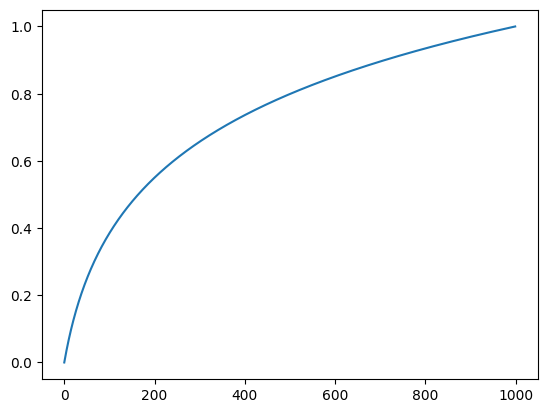

In [57]:
plt.plot(x)

In [76]:
import torch
import torch.nn.functional as F

In [68]:
x = torch.randint(0, 2, (11, 64, 10))
y = torch.randint(0, 2, (11, 64, 10))

In [71]:
x.sum(dim=1)

tensor([[29, 26, 26, 32, 30, 39, 29, 27, 32, 30],
        [34, 32, 31, 33, 35, 29, 36, 30, 33, 32],
        [35, 35, 29, 34, 31, 24, 31, 28, 34, 36],
        [27, 34, 32, 29, 35, 36, 30, 28, 32, 29],
        [29, 30, 28, 35, 29, 35, 30, 28, 29, 29],
        [29, 32, 33, 33, 37, 35, 24, 36, 26, 39],
        [35, 31, 37, 39, 31, 28, 32, 32, 26, 33],
        [37, 35, 23, 39, 27, 33, 38, 39, 30, 33],
        [36, 30, 31, 36, 32, 36, 38, 33, 31, 30],
        [31, 27, 32, 29, 31, 33, 29, 25, 33, 33],
        [40, 35, 39, 36, 26, 36, 35, 36, 28, 35]])

In [74]:
x = F.softmax(torch.rand(11, 64, 10), dim=-1)
y = F.softmax(torch.rand(11, 64, 10), dim=-1)

In [75]:
F.cross_entropy(x, y)

tensor(26.6198)

In [111]:
n = 8
b = 16
x = torch.tensor([[i, j] for i in range(b) for j in range(n)])
x.shape

torch.Size([128, 2])

In [112]:
torch.argsort((x[:, 0] * (x[:, 1].max() + 1)) + x[:, 1])

tensor([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
         28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
         42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
         56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,
         70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,
         84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
         98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111,
        112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
        126, 127])

In [113]:
b, n, h, w, c = 16, 8, 64, 64, 10
clusters, probs, hots = torch.randint(0, c, (b * n, h, w)), torch.rand(b * n, h, w, c), F.gumbel_softmax(torch.rand(b * n, h, w, c), hard=True)
clusters.shape, probs.shape, hots.shape

(torch.Size([128, 64, 64]),
 torch.Size([128, 64, 64, 10]),
 torch.Size([128, 64, 64, 10]))

In [114]:
from einops import rearrange
clusters, probs, hots = rearrange(clusters, '(b n) h w -> b n h w', n=n), rearrange(probs, '(b n) h w c -> b n h w c', b=b, n=n), rearrange(hots, '(b n) h w c -> b n h w c', b=b, n=n)
clusters.shape, probs.shape, hots.shape

(torch.Size([16, 8, 64, 64]),
 torch.Size([16, 8, 64, 64, 10]),
 torch.Size([16, 8, 64, 64, 10]))

In [107]:
clusters_pred, clusters_target = clusters[:, :n-1], clusters[:, 1:]
probs_pred, probs_target = probs[:, :n-1], probs[:, 1:]
hots_pred, hots_target = clusters[:, :n-1], clusters[:, 1:]
probs_pred.shape, probs_target.shape

(torch.Size([16, 7, 64, 64, 10]), torch.Size([16, 7, 64, 64, 10]))

In [109]:
probs_pred = rearrange(probs_pred, 'b ... c -> b c ...')
probs_target = rearrange(probs_target, 'b ... c -> b c ...')

In [110]:
F.cross_entropy(probs_pred, probs_target, )

tensor(11.7015)